## Model Building

In this notebook, we will create a KMeans clustering model that will cluster the books into different categories. We may then use this model as a simple content-based recommender system. (A content-based recommender system will give answers to questions such as- 'I really liked book X. Please give me a list of books that are similar to X')

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
plt.rcParams['figure.figsize'] = (10,7)
plt.style.use('default')

Let's read in the csv file that we created in the previous notebook, which has the genre columns that we will use for the classification.

In [8]:
booksfinal = pd.read_csv('booksfinal.csv').iloc[:,1:]
booksfinal.head()

book_title            author  num_pages  \
0  Harry Potter and the Half-Blood Prince      J.K. Rowling        652   
1                        Clockwork Prince   Cassandra Clare        498   
2    The Lion, the Witch and the Wardrobe        C.S. Lewis        206   
3                              The Reader  Bernhard Schlink        216   
4                       Gabriel's Inferno   Sylvain Reynard        506   

                                              genres  average_rating  \
0  ['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...            4.57   
1  ['Fantasy', 'Young Adult', 'Romance', 'Fantasy...            4.42   
2  ['Fantasy', 'Classics', 'Fiction', 'Young Adul...            4.22   
3  ['Fiction', 'Historical > Historical Fiction',...            3.77   
4  ['Romance', 'Romance > Contemporary Romance', ...            4.00   

   Academic  Academic > College  Academic > Read For School  \
0       0.0                 0.0                         0.0   
1       0.0                 0.0                         0.0   
2       0.0                 0.0                         0.0   
3       0.0                 0.0                         0.0   
4       0.0                 1.0                         0.0   

   Academic > School  Action  ...  Writing > Books About Books  \
0                0.0     0.0  ...                          0.0   
1                0.0     0.0  ...                          0.0   
2                0.0     0.0  ...                          0.0   
3                0.0     0.0  ...                          0.0   
4                0.0     0.0  ...                          0.0   

   Writing > Essays  Writing > Journalism  Young Adult  \
0               0.0                   0.0          1.0   
1               0.0                   0.0          1.0   
2               0.0                   0.0          1.0   
3               0.0                   0.0          0.0   
4               0.0                   0.0          0.0   

   Young Adult > Coming Of Age  Young Adult > High School  Young Adult > Teen  \
0                          0.0                        0.0                 0.0   
1                          0.0                        0.0                 0.0   
2                          0.0                        0.0                 0.0   
3                          0.0                        0.0                 0.0   
4                          0.0                        0.0                 0.0   

   Young Adult > Young Adult Contemporary  Young Adult > Young Adult Fantasy  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   

   Young Adult > Young Adult Romance  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0  

[5 rows x 328 columns]

**We will use the KMeans algorithm to cluster the books into different categories. We will use a line plot to find the ideal number of clusters**

In [11]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans()

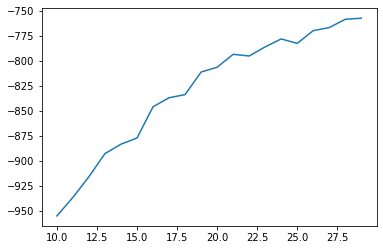

In [14]:
kmscores = []
clustercount = np.arange(10,30)
for i in clustercount:
    km.set_params(n_clusters=i)
    km.fit(X,y)
    kmscores.append(km.score(X_test,y_test))

plt.plot(clustercount,kmscores)

We will use a cluster number of 25 to create our model

In [237]:
km.set_params(n_clusters=25)
km.fit(X,y)

KMeans(n_clusters=25)

In [238]:
set(km.labels_)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

**Let's now concatenate the labels to the original dataframe, so that we can see which books belong to which labels**

In [18]:
booklabel = pd.concat([booksfinal,pd.DataFrame(km.labels_)],axis=1)
booklabel.columns = list(booksfinal.columns) + ['Label']

In [28]:
booklabel.shape

(1000, 329)

Let's drop all the columns that we will not use for verification

In [216]:
booklabel1 = booklabel[~booklabel['Label'].isnull()].sort_values('Label')[['book_title','author','genres','Label']]

In [217]:
booklabel1.shape

(1000, 4)

**Let's see which category is the most popular**

In [23]:
booklabel['Label'].value_counts()

19    76
1     70
4     56
6     54
12    54
11    52
24    46
7     44
10    42
0     41
22    41
3     37
9     37
20    36
2     35
5     33
15    33
14    31
18    30
13    28
23    27
16    26
8     26
21    25
17    20
Name: Label, dtype: int64

**Hmm.. Looks like category 19 is the most popular. Let's check the highest rated books from category 19. (Any guesses which category this might be?)**

In [213]:
booklabel[booklabel['Label'] == 19].sort_values('average_rating',ascending=False).head(10)[['Label','book_title','author','genres','average_rating']]

Label                                 book_title                author  \
943     19                Harry Potter Series Box Set          J.K. Rowling   
137     19       Harry Potter and the Deathly Hallows          J.K. Rowling   
707     19   Harry Potter and the Prisoner of Azkaban          J.K. Rowling   
0       19     Harry Potter and the Half-Blood Prince          J.K. Rowling   
785     19        Harry Potter and the Goblet of Fire          J.K. Rowling   
301     19  Harry Potter and the Order of the Phoenix          J.K. Rowling   
443     19      Harry Potter and the Sorcerer's Stone          J.K. Rowling   
191     19    Harry Potter and the Chamber of Secrets          J.K. Rowling   
57      19                The Little House Collection  Laura Ingalls Wilder   
590     19                                    Matilda            Roald Dahl   

                                                genres  average_rating  
943  ['Fantasy', 'Young Adult', 'Fiction', 'Childre...            4.72  
137  ['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...            4.62  
707  ['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...            4.57  
0    ['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...            4.57  
785  ['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...            4.56  
301  ['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...            4.50  
443  ['Fantasy', 'Fiction', 'Young Adult', 'Fantasy...            4.47  
191  ['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...            4.43  
57   ['Classics', 'Historical > Historical Fiction'...            4.34  
590  ['Childrens', 'Fiction', 'Classics', 'Fantasy'...            4.32

The category which includes the Harry Potter series is the most popular category. This seems to make sense. As we saw in our exploratory data analysis, the Young Fiction/Fantasy/Young Adult categories are some of the most popular.

### Verify the labels using a word cloud

For each category/label, we will create a word cloud using the genres that belong to that category as the words. For example, if label 0 has many books that belong to the 'Fantasy' genre, and only a few that belong to the 'Classic' genre, then the word 'Fantasy' would be more promiment in the word cloud. Using these word clouds, we can identify the type of books each label has.

Let's first create a dictionary which contains the labels as its keys, and the list of genres (with duplicates. i.e, if the genre 'Fantasy' appears twice, it should be there twice in the list)

In [205]:
genlabel = {}
for i in set(booklabel.Label):
    gnrlist = []
    gnrseries = booklabel1[booklabel1['Label'] == i]['genres']
    l = []
    for g in gnrseries:
        l = l + eval(g)
    gnrlabel[i] = l  


Let's look at label 1 in the dictionary (I've limited the number of items to 15 to avoid long lists in github)

In [221]:
gnrlabel[1][:15]

['Classics',
 'Fiction',
 'Literature',
 'Literature > 19th Century',
 'Historical > Victorian',
 'Novels',
 'European Literature > British Literature',
 'Historical > Historical Fiction',
 'Classics > Classic Literature',
 'Literary Fiction',
 'Historical > Historical Fiction',
 'Fiction',
 'Military History > Civil War',
 'War',
 'Historical']

Good! That looks like the Classical/Historical Fiction/Literature category. Now let's create the wordclouds to visualize these categories

In [98]:
from wordcloud import WordCloud

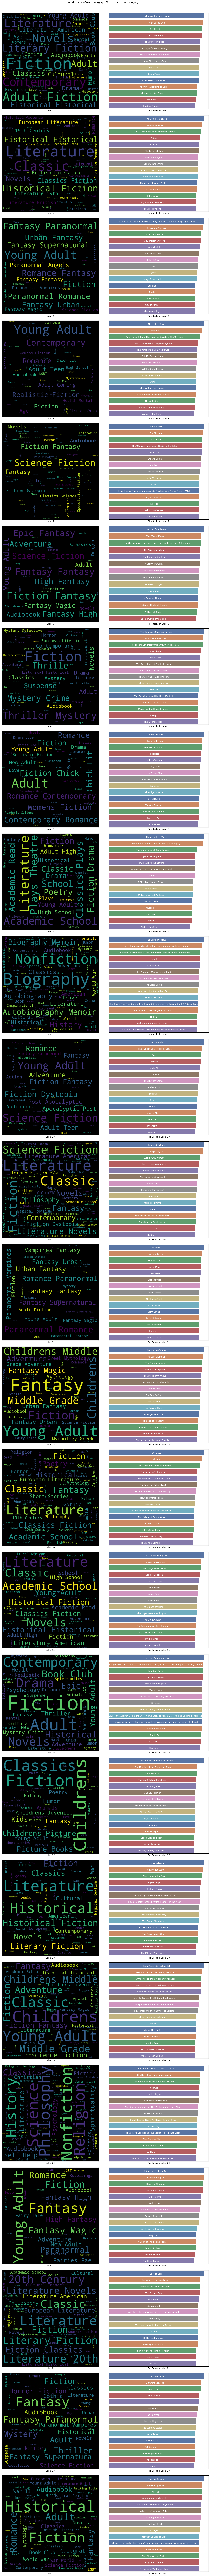

In [235]:
fig, axs = plt.subplots(len(set(km.labels_)),2,figsize=(15,180))
fig.suptitle('Word clouds of each category | Top books in that category')
fig.tight_layout()
fig.subplots_adjust(top=0.9757)
wordcloud = WordCloud(width = 800, height = 800)

for i in range(len(set(km.labels_))):
    wordcloud.generate(','.join(map(str,gnrlabel[i])))
    axs[i][0].imshow(wordcloud)
    axs[i][0].set_xticks([])
    axs[i][0].set_yticks([])
    axs[i][0].set_xlabel(f'Label {i}')
    maxbks = 15
    bplt = sns.barplot(y=booklabel[booklabel['Label']==i].sort_values('average_rating',ascending=False)['book_title'].head(maxbks),\
                x=booklabel[booklabel['Label']==i].sort_values('average_rating',ascending=False)['average_rating'].head(maxbks),\
                ax=axs[i][1],palette='deep')
    for e,p in enumerate(bplt.patches):
        bplt.annotate( booklabel[booklabel['Label']==i].sort_values('average_rating',ascending=False)['book_title'].head(maxbks).iloc[e], 
                       (p.get_width()/2., p.get_y()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -15), 
                       textcoords = 'offset points',
                       color='white')
    axs[i][1].set_xticks([])
    axs[i][1].set_yticks([])
    axs[i][1].set_xlabel(f'Top Books in Label {i}')
    axs[i][1].set_ylabel('')

### Conclusion

Great! The clustering works (atleast, works well enough for a beginner personal project). You can use it to find books that are similar to your favorite books. The other books in the list also belong to the top 1000 books on goodreads, so it's quite likely that you might find a book that you will enjoy. 

**Notes**<br>
The model could have been greatly improved if we had taken into account the 'weights' of each genre that are assigned to a book:
![Genre Weights](genreimage.PNG)

If we had taken the normalized weights of each genre instead of just using a 1 or a 0 which will only tell us if a book belongs to a genre or not, we could find out the degree to which each book belongs to a genre. The screenshot above shows the genres to which Harry Potter and the Chamber of Secrets belongs. We can see that it is much more a Fantasy book than a Classic or a Science Fiction Fantasy. If we had assigned these weights, we might know this degree, and thus create a more accurate recommender system. However, the weights were not returned by the [goodreads scraper](https://github.com/maria-antoniak/goodreads-scraper), and creating a custom scraper for that is out of scope for this project.
<br><br>
Furthermore, we can use the labels found by the KMeans model to create a classification model (using the labels as the target variable), and use this model to create a recommender system that can accpet books that are not within the data set used to train the KMeans model, to make recommendations.
<br><br>
In the next notebook we will try to optimize the data transformation and model creation using a pipeline. <br>
That's all for now! Hope you cound find a book that you might enjoy!

In [ ]:
### END